In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data into a pandas DataFrame:
df = pd.read_csv('Hallet_LLR complete data (1) - Sheet1.csv')
df

,Sr No,AGE,Time,Input (X),Output (y),HR,Height,Weight
0,1,Under-1,3:00:00 AM,36.8,36.8,176,43,2.5
1,1,Under-1,4:00:00 AM,38.6,36.0,162,43,2.5
2,1,Under-1,5:00:00 AM,36.8,36.8,167,43,2.5
3,1,Under-1,6:00:00 AM,36.8,33.4,160,43,2.5
4,1,Under-1,7:00:00 AM,30.6,33.4,160,43,2.5
...,...,...,...,...,...,...,...,...
2790,77,Under-4,7:00:00 PM,35.6,35.8,141,47,2.8
2791,77,Under-4,7:30:00 PM,35.7,35.9,145,47,2.8
2792,77,Under-4,8:00:00 PM,35.8,36.0,148,47,2.8
2793,77,Under-4,8:30:00 PM,35.7,36.1,147,47,2.8


In [3]:
# the output will show the last 4 rows of the dataset
df.tail()


,Sr No,AGE,Time,Input (X),Output (y),HR,Height,Weight
2790,77,Under-4,7:00:00 PM,35.6,35.8,141,47,2.8
2791,77,Under-4,7:30:00 PM,35.7,35.9,145,47,2.8
2792,77,Under-4,8:00:00 PM,35.8,36.0,148,47,2.8
2793,77,Under-4,8:30:00 PM,35.7,36.1,147,47,2.8
2794,77,Under-4,9:00:00 PM,35.6,36.0,145,47,2.8


In [4]:
#Generate summary statistics for the numerical columns
df.describe()

,Sr No,Input (X),Output (y),HR,Height,Weight
count,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000
mean,44.211449,36.846869,36.929138,147.235420,45.749911,2.422279
std,20.936879,8.607253,6.436327,68.189436,3.725081,0.518623
min,1.000000,30.100000,29.800000,60.000000,31.000000,1.000000
25%,26.000000,36.200000,36.500000,138.000000,44.000000,2.200000
50%,52.000000,36.700000,37.000000,144.000000,47.000000,2.500000
75%,61.000000,37.000000,37.200000,154.000000,48.000000,2.750000
max,77.000000,367.000000,373.000000,3155.000000,52.000000,3.800000


In [5]:
#FILTERING OUT THE COLUMNS 
#Object = non numerical data. False - numerical. True - non numerical with boolean.
df.dtypes == 'object'

Sr No         False
AGE            True
Time           True
Input (X)     False
Output (y)    False
HR            False
Height        False
Weight        False
dtype: bool

In [6]:
#Separate Categorical and numerical columns
num_var = df.columns[df.dtypes != 'object'] #  not object. non- categorical which is Numerical
categ_var = df.columns[df.dtypes == 'object'] #  object. categorical

print(num_var)
print(categ_var)

Index(['Sr No', 'Input (X)', 'Output (y)', 'HR', 'Height', 'Weight'], dtype='object')
Index(['AGE', 'Time'], dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sr No       2795 non-null   int64  
 1   AGE         2795 non-null   object 
 2   Time        2795 non-null   object 
 3   Input (X)   2795 non-null   float64
 4   Output (y)  2795 non-null   float64
 5   HR          2795 non-null   int64  
 6   Height      2795 non-null   int64  
 7   Weight      2795 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 174.8+ KB


In [8]:
# Check the data types of the columns:
df.dtypes

Sr No           int64
AGE            object
Time           object
Input (X)     float64
Output (y)    float64
HR              int64
Height          int64
Weight        float64
dtype: object

In [9]:
# will holds all the columns which are not object data type
df[num_var]

,Sr No,Input (X),Output (y),HR,Height,Weight
0,1,36.8,36.8,176,43,2.5
1,1,38.6,36.0,162,43,2.5
2,1,36.8,36.8,167,43,2.5
3,1,36.8,33.4,160,43,2.5
4,1,30.6,33.4,160,43,2.5
...,...,...,...,...,...,...
2790,77,35.6,35.8,141,47,2.8
2791,77,35.7,35.9,145,47,2.8
2792,77,35.8,36.0,148,47,2.8
2793,77,35.7,36.1,147,47,2.8


In [10]:
# 1.isnull() function to identify the missing values in the data frame

#function to find out all the fields which have missing values.
#This will return 
#TRUE = if a field has missing values 
#FALSE = if the field does not have missing values.


df[num_var].isnull()
# I don't see any True on column, therefore, there is no missing value

,Sr No,Input (X),Output (y),HR,Height,Weight
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2790,False,False,False,False,False,False
2791,False,False,False,False,False,False
2792,False,False,False,False,False,False
2793,False,False,False,False,False,False


In [11]:
#2.sum() functions to get sum of all missing values per column

#To get how many missing values are in each column we use sum() along with isnull()
#This will sum up all the True’s in each column from the previous code isnull()

df[num_var].isnull().sum()
# No missing values 

Sr No         0
Input (X)     0
Output (y)    0
HR            0
Height        0
Weight        0
dtype: int64

In [12]:
#Remove duplicate rows:
df = df.drop_duplicates()
df

,Sr No,AGE,Time,Input (X),Output (y),HR,Height,Weight
0,1,Under-1,3:00:00 AM,36.8,36.8,176,43,2.5
1,1,Under-1,4:00:00 AM,38.6,36.0,162,43,2.5
2,1,Under-1,5:00:00 AM,36.8,36.8,167,43,2.5
3,1,Under-1,6:00:00 AM,36.8,33.4,160,43,2.5
4,1,Under-1,7:00:00 AM,30.6,33.4,160,43,2.5
...,...,...,...,...,...,...,...,...
2790,77,Under-4,7:00:00 PM,35.6,35.8,141,47,2.8
2791,77,Under-4,7:30:00 PM,35.7,35.9,145,47,2.8
2792,77,Under-4,8:00:00 PM,35.8,36.0,148,47,2.8
2793,77,Under-4,8:30:00 PM,35.7,36.1,147,47,2.8


In [13]:
# 3. sort_values(ascending=False) function to get columns with the missing values in descending order.

#Sorting the columns in descending order is always a good idea so you can discover which ones have the most missing values. 
#The sort values() function can be used to achieve this. This function will always sort in ascending order by default. 
# We want to set it to descending because we want the columns with the most missing values to appear first. This can be accomplished by  “ascending=False” parameter in sort_values().

#.sort_values(ascending=False)

df[num_var].isnull().sum().sort_values(ascending=False)

Sr No         0
Input (X)     0
Output (y)    0
HR            0
Height        0
Weight        0
dtype: int64

In [14]:
#MEAN
mean = df.mean()

mean
# these are the mean output from the dataset

/var/folders/k7/g4wn_mkn3mb4_83c39g3w7n00000gn/T/ipykernel_16030/2646300123.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()


Sr No          44.211449
Input (X)      36.846869
Output (y)     36.929138
HR            147.235420
Height         45.749911
Weight          2.422279
dtype: float64

In [15]:
#MEDIAN
median = df.median()
median
#these are the output median calculation

/var/folders/k7/g4wn_mkn3mb4_83c39g3w7n00000gn/T/ipykernel_16030/2617527964.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df.median()


Sr No          52.0
Input (X)      36.7
Output (y)     37.0
HR            144.0
Height         47.0
Weight          2.5
dtype: float64

In [16]:
# STANDARD DEVIATION
standard = df.std()
standard
# these are the output of standard deviation calculation 

/var/folders/k7/g4wn_mkn3mb4_83c39g3w7n00000gn/T/ipykernel_16030/3507046560.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  standard = df.std()


Sr No         20.936879
Input (X)      8.607253
Output (y)     6.436327
HR            68.189436
Height         3.725081
Weight         0.518623
dtype: float64

In [17]:
#MODE
mode = df.mode()
mode

,Sr No,AGE,Time,Input (X),Output (y),HR,Height,Weight
0,52,Under-1,12:00:00 PM,36.8,37.2,144,47,2.5


In [18]:
# Define the upper and lower bounds

upper_bound = mean + 3 * standard

upper_bound

Sr No         107.022087
Input (X)      62.668628
Output (y)     56.238118
HR            351.803730
Height         56.925154
Weight          3.978147
dtype: float64

In [19]:
lower_bound = mean - 3 * standard

lower_bound

Sr No        -18.599189
Input (X)     11.025111
Output (y)    17.620157
HR           -57.332889
Height        34.574667
Weight         0.866411
dtype: float64

In [20]:
# Select the outliers
outliers = df[(df > upper_bound) | (df < lower_bound)]

# Print the rows containing the outliers
print(outliers.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794],
           dtype='int64', length=2795)


/var/folders/k7/g4wn_mkn3mb4_83c39g3w7n00000gn/T/ipykernel_16030/2347500830.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df > upper_bound) | (df < lower_bound)]


<AxesSubplot:xlabel='Input (X)', ylabel='Output (y)'>

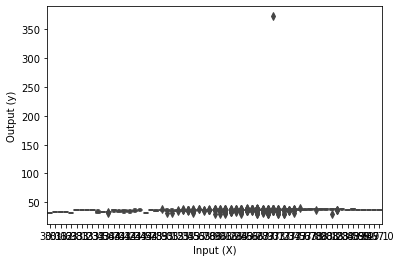

In [28]:
# Create a box plot of input and output
sns.boxplot(x='Input (X)', y='Output (y)',data=df)

In [22]:
# Calculate the mean and std deviation of Age and time column
#AGE	
data = df.iloc[: ,1]
data

0       Under-1
1       Under-1
2       Under-1
3       Under-1
4       Under-1
         ...   
2790    Under-4
2791    Under-4
2792    Under-4
2793    Under-4
2794    Under-4
Name: AGE, Length: 2795, dtype: object

In [23]:
# time 
data1 = df.iloc[: ,2]
data1

0       3:00:00 AM
1       4:00:00 AM
2       5:00:00 AM
3       6:00:00 AM
4       7:00:00 AM
           ...    
2790    7:00:00 PM
2791    7:30:00 PM
2792    8:00:00 PM
2793    8:30:00 PM
2794    9:00:00 PM
Name: Time, Length: 2795, dtype: object

In [24]:
# SKEWNESS
df.skew()

/var/folders/k7/g4wn_mkn3mb4_83c39g3w7n00000gn/T/ipykernel_16030/2960310620.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Sr No         -0.438741
Input (X)     36.985983
Output (y)    50.975743
HR            35.038760
Height        -1.127887
Weight        -0.720524
dtype: float64

(array([1758.,    0.,    0.,  574.,    0.,    0.,  202.,    0.,    0.,
         261.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

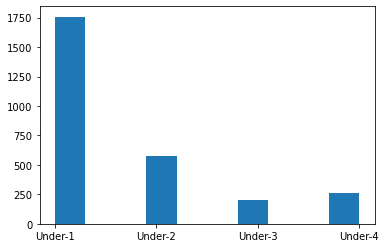

In [25]:
# create histogram of 'Age' column
plt.hist(df['AGE'])
 # POSITIVE or RIGHT SKEWED

(array([699., 780., 588., 126., 106., 168.,  97.,  97.,  85.,  49.]),
 array([ 0. ,  8.5, 17. , 25.5, 34. , 42.5, 51. , 59.5, 68. , 76.5, 85. ]),
 <BarContainer object of 10 artists>)

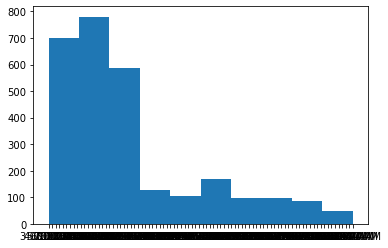

In [26]:
# create histogram of 'Age' column
plt.hist(df['Time'])
 # POSITIVE or RIGHT SKEWED

In [27]:
#KURTOSIS 
df.kurt()

/var/folders/k7/g4wn_mkn3mb4_83c39g3w7n00000gn/T/ipykernel_16030/1298500927.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Sr No           -0.956537
Input (X)     1378.938522
Output (y)    2663.112840
HR            1433.584779
Height           1.678764
Weight           0.894742
dtype: float64

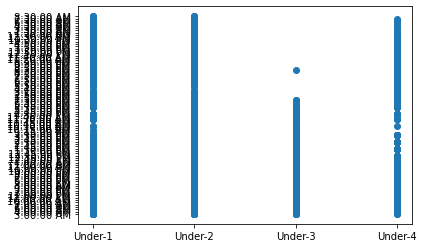

In [29]:
# Scatter 

plt.scatter(x=df['AGE'],y=df['Time'])

In [ ]:
help()